<a href="https://colab.research.google.com/github/FranziskoB/Clusters/blob/main/Py_Clusters_Exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusters: Exemplo 1

Neste notebook será apresentado um exemplo de aplicação de uma análise de cluters em um dataset simples.

##Importando as bibliotecas:

In [15]:
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.stats as stats
from sklearn.cluster import KMeans

##Importando os dados

In [16]:
vestibular=pd.read_csv("https://raw.githubusercontent.com/FranziskoB/Clusters/main/dados/vestibular.csv")

Visualizando os dados

In [17]:
vestibular.head(5)

,Unnamed: 0,estudante,matematica,fisica,quimica
0,1,Gabriela,3.7,2.7,9.1
1,2,Luiz Felipe,7.8,8.0,1.5
2,3,Patricia,8.9,1.0,2.7
3,4,Ovidio,7.0,1.0,9.0
4,5,Leonor,3.4,2.0,5.0


Corrigindo o tabela de dados

In [18]:
vestibular=vestibular.drop(columns=['Unnamed: 0'])
vestibular.head(5)

,estudante,matematica,fisica,quimica
0,Gabriela,3.7,2.7,9.1
1,Luiz Felipe,7.8,8.0,1.5
2,Patricia,8.9,1.0,2.7
3,Ovidio,7.0,1.0,9.0
4,Leonor,3.4,2.0,5.0


##Gráfico 3D com scatter

Text(0.5, 0, 'Física')

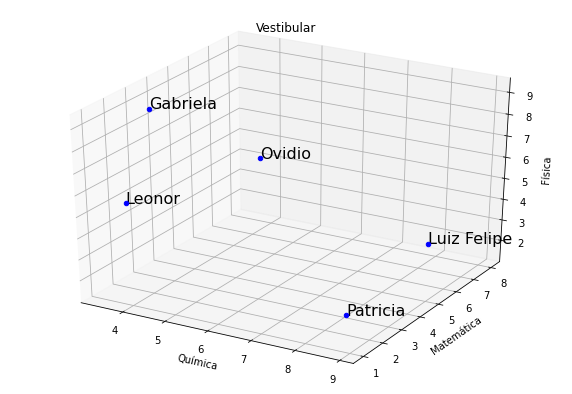

In [19]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
plt.title("Vestibular")
for i in range(len(vestibular)): # Inserindo os nomes sobre cada ponto
    ax.scatter(vestibular.loc[i][1],vestibular.loc[i][2],vestibular.loc[i][3],color='b') 
    ax.text(vestibular.loc[i][1],vestibular.loc[i][2],vestibular.loc[i][3],  '%s' % (vestibular.loc[i][0]), size=16, zorder=1,  
    color='k') 
ax.set_xlabel('Química')
ax.set_ylabel('Matemática')
ax.set_zlabel('Física')

##Estatísticas descritivas

In [20]:
vestibular.describe()

,matematica,fisica,quimica
count,5.000000,5.000000,5.000000
mean,6.160000,2.940000,5.460000
std,2.478508,2.918561,3.510413
min,3.400000,1.000000,1.500000
25%,3.700000,1.000000,2.700000
50%,7.000000,2.000000,5.000000
75%,7.800000,2.700000,9.000000
max,8.900000,8.000000,9.100000


Boxplots por variável

In [21]:
#Organizando os dados
matematica=pd.DataFrame(vestibular['matematica'])
matematica.columns=(['Nota'])
matematica["materia"]='matematica'
quimica=pd.DataFrame(vestibular['quimica'])
quimica.columns=(['Nota'])
quimica["materia"]='quimica'
fisica=pd.DataFrame(vestibular['fisica'])
fisica.columns=(['Nota'])
fisica["materia"]='fisica'
boxplot=pd.concat([fisica,quimica,matematica])


fig = px.box(boxplot, y="Nota",x="materia")
fig.show()


## Esquema de aglomeração hierárquico


Realizando a padronização dos dados utilizando o método Zscore

In [22]:
vest = vestibular.drop(columns=['estudante']) # Deixando so as colunas com valores metricos 
vest_scaled = vest.copy()
vest_scaled.iloc[:, :] = StandardScaler().fit_transform(vest)
vest_scaled

,matematica,fisica,quimica
0,-1.109685,-0.091938,1.159306
1,0.739790,1.938370,-1.261223
2,1.235991,-0.743170,-0.879034
3,0.378917,-0.743170,1.127457
4,-1.245013,-0.360092,-0.146506


Elaborando o dendograma

*   Distância euclidiana e método de encadeamento single linkage



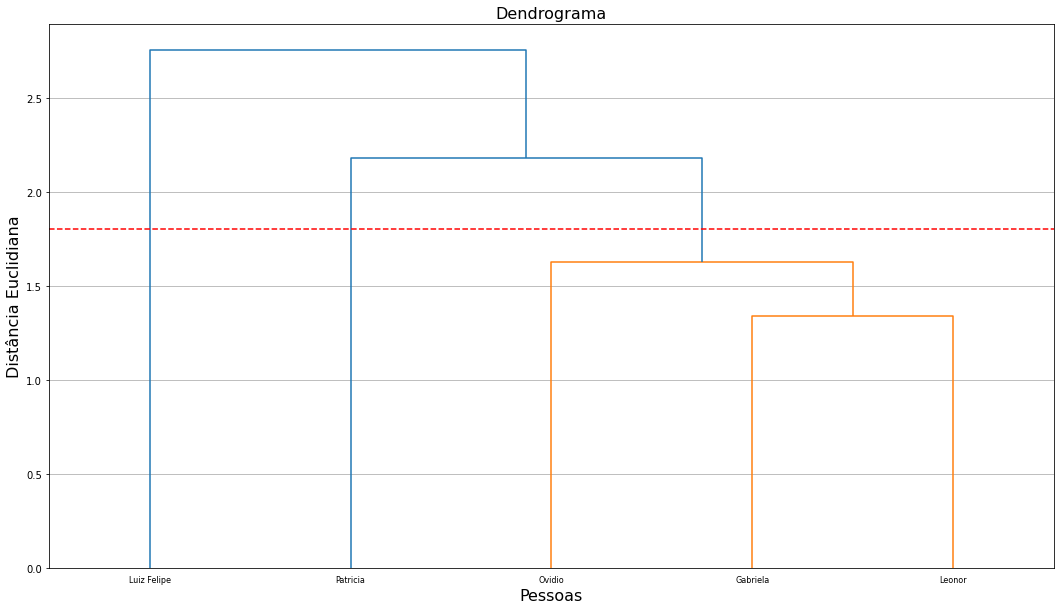

In [23]:

Z = hierarchy.linkage(vest_scaled, method='single', metric='euclidean')
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(vestibular['estudante']), leaf_font_size=8)

plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 1.8, color = 'red', linestyle = '--')
plt.show()



Como já observamos 3 clusters pelo dendrograma, vamos selecionar "3" clusters

 A medida de distância e o método de encadeamento são mantidos

In [24]:
cluster_sing = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(vest) # Retorna uma lista de valores com o cluster de cada observação

print(indica_cluster_sing, "\n")

[0 1 2 0 0] 



In [25]:
vestibular['cluster_single'] = indica_cluster_sing
print(vestibular)

     estudante  matematica  fisica  quimica  cluster_single
0     Gabriela         3.7     2.7      9.1               0
1  Luiz Felipe         7.8     8.0      1.5               1
2     Patricia         8.9     1.0      2.7               2
3       Ovidio         7.0     1.0      9.0               0
4       Leonor         3.4     2.0      5.0               0


## Comparando clusters resultantes por diferentes métodos de encadeamento

Complete e average linkage

In [26]:
cluster_comp = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(vest)

cluster_avg = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
indica_cluster_avg = cluster_avg.fit_predict(vest)

In [27]:
vestibular['cluster_average'] = indica_cluster_avg
vestibular['cluster_complete'] = indica_cluster_comp
print(vestibular[{'estudante','cluster_single','cluster_complete','cluster_average'}])

   cluster_average    estudante  cluster_single  cluster_complete
0                0     Gabriela               0                 0
1                1  Luiz Felipe               1                 2
2                2     Patricia               2                 1
3                0       Ovidio               0                 0
4                0       Leonor               0                 0


Os resultados de formação dos clusters foram os mesmos mudando o método de encadeamento

## Cluster Não Hierárquico K-means

Considerando que identificamos 3 possíveis clusters na análise hierárquica

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'random').fit(vest)

Para identificarmos os clusters gerados

In [29]:
kmeans_clusters = kmeans.labels_

print(kmeans_clusters)

[1 2 0 1 1]


In [30]:
vestibular['cluster_kmeans'] = kmeans_clusters
print(vestibular[{'cluster_single','cluster_complete','cluster_average','cluster_kmeans'}])

   cluster_average  cluster_kmeans  cluster_complete  cluster_single
0                0               1                 0               0
1                1               2                 2               1
2                2               0                 1               2
3                0               1                 0               0
4                0               1                 0               0


Identificando as coordenadas centróides dos clusters finais

In [31]:

cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = vest.columns
cent_finais.index.name = 'cluster'
print(cent_finais)

         matematica  fisica  quimica
cluster                             
0               8.9     1.0      2.7
1               4.7     1.9      7.7
2               7.8     8.0      1.5


Plotando as observações e seus centróides dos clusters

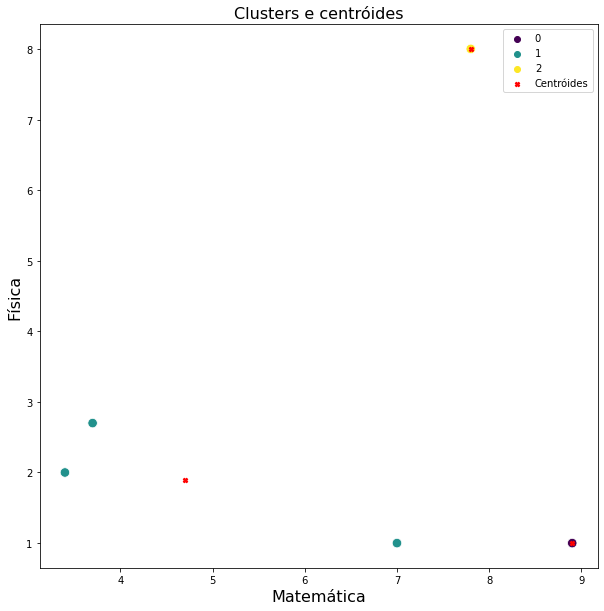

In [35]:
plt.figure(figsize=(10,10))

pred_y = kmeans.fit_predict(vest)
sns.scatterplot(x='matematica', y='fisica', data=vestibular, hue='cluster_kmeans', palette='viridis', s=90)
plt.scatter(cent_finais['matematica'], cent_finais['fisica'], s = 20, c = 'red', label = 'Centróides', marker="X")
plt.title('Clusters e centróides', fontsize=16)
plt.xlabel('Matemática', fontsize=16)
plt.ylabel('Física', fontsize=16)
plt.legend()
plt.show()

Identificação da quantidade de clusters


*   Método Elbow para identificação do nº de clusters
*   Elaborado com base na "inércia": distância de cada obervação para o centróide de seu cluster
*   Quanto mais próximos entre si e do centróide, menor a inércia


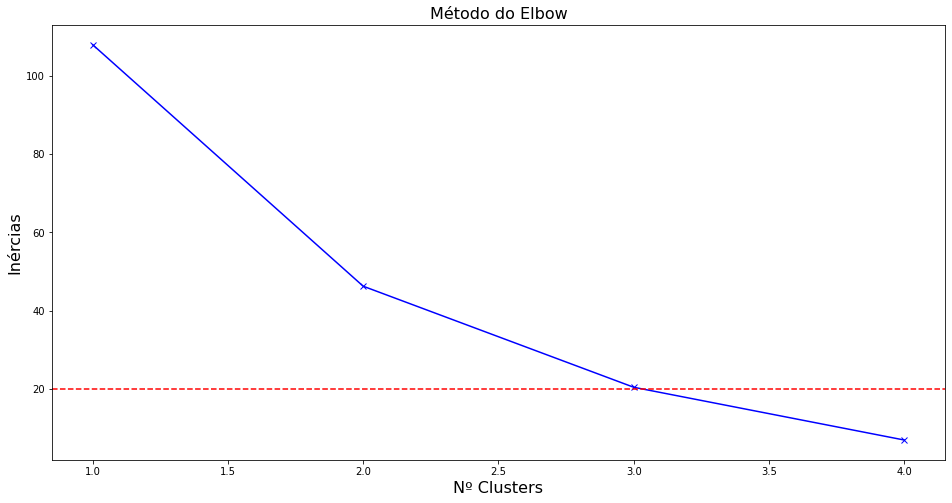

In [47]:

inercias = []
K = range(1,vest.shape[0])
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(vest)
    inercias.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inercias, 'bx-')
plt.axhline(y = 20, color = 'red', linestyle = '--')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Inércias', fontsize=16)
plt.title('Método do Elbow', fontsize=16)
plt.show()

Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra"

 ## Estatística F

Análise de variância de um fator:
As variáveis que mais contribuem para a formação de pelo menos um dos clusters

In [48]:
def teste_f_kmeans(kmeans, dataframe):#Definindo uma função para o teste F
    
    variaveis = dataframe.columns

    centroides = pd.DataFrame(kmeans.cluster_centers_)
    centroides.columns = dataframe.columns
    centroides
    
    print("Centróides: \n", centroides ,"\n")

    df = dataframe[variaveis]

    unique, counts = np.unique(kmeans.labels_, return_counts=True)

    dic = dict(zip(unique, counts))

    qnt_clusters = kmeans.n_clusters

    observacoes = len(kmeans.labels_)

    df['cluster'] = kmeans.labels_

    output = []

    for variavel in variaveis:

        dic_var={'variavel':variavel}

        # variabilidade entre os grupos

        variabilidade_entre_grupos = np.sum([dic[index]*np.square(observacao - df[variavel].mean()) for index, observacao in enumerate(centroides[variavel])])/(qnt_clusters - 1)

        dic_var['variabilidade_entre_grupos'] = variabilidade_entre_grupos

        variabilidade_dentro_dos_grupos = 0

        for grupo in unique:

            grupo = df[df.cluster == grupo]

            variabilidade_dentro_dos_grupos += np.sum([np.square(observacao - grupo[variavel].mean()) for observacao in grupo[variavel]])/(observacoes - qnt_clusters)

        dic_var['variabilidade_dentro_dos_grupos'] = variabilidade_dentro_dos_grupos

        dic_var['F'] =  dic_var['variabilidade_entre_grupos']/dic_var['variabilidade_dentro_dos_grupos']
        
        dic_var['sig F'] =  1 - stats.f.cdf(dic_var['F'], qnt_clusters - 1, observacoes - qnt_clusters)

        output.append(dic_var)

    df = pd.DataFrame(output)
    
    print(df)

    return df

Os valores da estatística F são bastante sensíveis ao tamanho da amostra

In [49]:
output = teste_f_kmeans(kmeans,vest)

Centróides: 
    matematica  fisica  quimica
0         8.9     1.0      2.7
1         7.8     8.0      1.5
2         4.7     1.9      7.7 

     variavel  variabilidade_entre_grupos  variabilidade_dentro_dos_grupos  \
0  matematica                    8.295999                         3.990000   
1      fisica                   16.306000                         0.730000   
2     quimica                   19.176001                         5.470001   

           F     sig F  
0   2.079198  0.324760  
1  22.336985  0.042850  
2   3.505667  0.221943  


Apenas a variável das notas de física contribuiu significativamente para formação de pelo menos um grupo.

## Gráfico 3D final

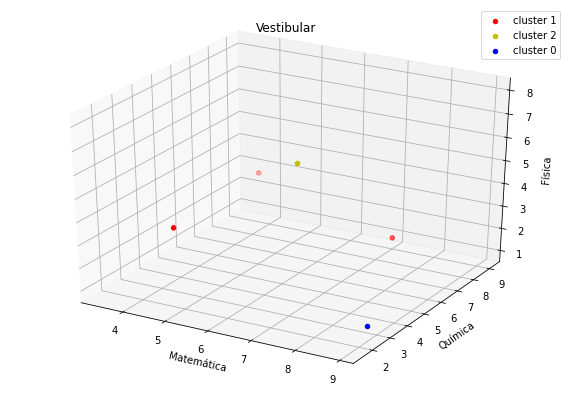

In [118]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
colors=['b','r','y']
cluters=vestibular['cluster_kmeans'].unique()
plt.title("Vestibular")
for i in cluters: # Inserindo os nomes sobre cada ponto
    ax.scatter(vestibular[vestibular['cluster_kmeans']==i].matematica.array,vestibular[vestibular['cluster_kmeans']==i].quimica.array,
               vestibular[vestibular['cluster_kmeans']==i].fisica.array,c=colors[i],label=('cluster '+str(i))) 
ax.set_ylabel('Química')
ax.set_xlabel('Matemática')
ax.set_zlabel('Física')
ax.legend()